# Contents : seller_MAU 

# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import os
import glob

import warnings
warnings.filterwarnings('ignore')

# 폰트설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [3]:
pd.options.display.max_columns=None
# pd.options.display.max_rows=10

# 데이터 로드

In [4]:
# 원본 데이터들
path1 = glob.glob('../1.EDA/data/*.*')
path1

['../1.EDA/data\\olist_closed_deals_dataset.csv',
 '../1.EDA/data\\olist_customers_dataset.csv',
 '../1.EDA/data\\olist_geolocation_dataset.csv',
 '../1.EDA/data\\olist_marketing_qualified_leads_dataset.csv',
 '../1.EDA/data\\olist_orders_dataset.csv',
 '../1.EDA/data\\olist_order_items_dataset.csv',
 '../1.EDA/data\\olist_order_payments_dataset.csv',
 '../1.EDA/data\\olist_order_reviews_dataset.csv',
 '../1.EDA/data\\olist_products_dataset.csv',
 '../1.EDA/data\\olist_sellers_dataset.csv',
 '../1.EDA/data\\product_category_name_translation.csv']

In [5]:
# 가공데이터들
path2 = glob.glob('./data/*.*')
path2

['./data\\event.csv',
 './data\\Order_OrderIndex_Product.csv',
 './data\\Order_OrderIndex_Product_Trans.csv',
 './data\\ords_cust_prd_item_seller_eng.csv',
 './data\\일별판매량.csv']

In [6]:
# 데이터로드 - 카피
raw = pd.read_csv('./data/ords_cust_prd_item_seller_eng.csv')
df = raw.copy()

# 데이터 확인 및 컬럼 정리
## 데이터 확인

In [7]:
df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares


In [8]:
df.tail(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
113423,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,1.0,cc9e875c2df286dbed83efe01191162c,c731d18cea9bf687ffee82a241c25b11,2017-08-04 18:25:20,129.00,26.18,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,la_cuisine,57.0,429.0,1.0,2700.0,85.0,7.0,40.0,89701.0,concordia,SC,la_cuisine
113424,c72888e51a36defb7b5d49201fcbccf7,c3cd86c3cbac654f8558a8286ba93c1c,delivered,2017-07-11 10:45:57,2017-07-11 10:55:14,2017-07-11 19:14:48,2017-07-19 17:27:43,2017-08-04 00:00:00,1.0,724c49c346d2979339d366fa59ce49de,3078096983cf766a32a06257648502d1,2017-07-17 10:55:14,119.99,27.16,d8b80a0bd7560fab10e804f36d99fe33,90220,porto alegre,RS,la_cuisine,33.0,532.0,1.0,3600.0,30.0,30.0,30.0,13720.0,scao jose do rio pardo,SP,la_cuisine


## 컬럼 정리

In [9]:
len(df.columns)

30

In [10]:
[i for i in df.columns]

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'product_category_name_english']

In [11]:
# 필요컬럼
new_cols = [ 
 # orders
 'order_id', # *주문컬럼
 'order_status', # *주문형태컬럼
 'order_purchase_timestamp', # * 주문시간컬럼
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id', # null = 775 * 수량
 # customer
 'customer_id', # * 주문고객번호
 'customer_unique_id', # *고객 고유번호
 # product
 'product_id', # *프로덕트 번호
 'product_category_name', # *카테고리(포르투갈)
 'product_category_name_english', # 카테고리 (영어)
 'price', # *가격
 #seller
 'seller_id',
 'seller_city',
 'seller_state'
]

In [12]:
df = df[new_cols]

In [13]:
len(df.columns)

17

# 데이터 확인

In [14]:
df.head(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_id,customer_unique_id,product_id,product_category_name,product_category_name_english,price,seller_id,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   order_status                   113425 non-null  object 
 2   order_purchase_timestamp       113425 non-null  object 
 3   order_approved_at              113264 non-null  object 
 4   order_delivered_carrier_date   111457 non-null  object 
 5   order_delivered_customer_date  110196 non-null  object 
 6   order_estimated_delivery_date  113425 non-null  object 
 7   order_item_id                  112650 non-null  float64
 8   customer_id                    113425 non-null  object 
 9   customer_unique_id             113425 non-null  object 
 10  product_id                     112650 non-null  object 
 11  product_category_name          111047 non-null  object 
 12  product_category_name_english 

# 유효데이터 추출

In [16]:
df['price'].isnull().sum()

775

In [17]:
df['order_item_id'].isnull().sum()

775

In [18]:
df = df[df['order_id'].notnull() & (df['price'].notnull()& df['price'] > 0)]
df.shape

(112650, 17)

In [19]:
df['order_item_id'].isnull().sum()

0

In [20]:
df['seller_id'].isnull().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 113424
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_status                   112650 non-null  object 
 2   order_purchase_timestamp       112650 non-null  object 
 3   order_approved_at              112635 non-null  object 
 4   order_delivered_carrier_date   111456 non-null  object 
 5   order_delivered_customer_date  110196 non-null  object 
 6   order_estimated_delivery_date  112650 non-null  object 
 7   order_item_id                  112650 non-null  float64
 8   customer_id                    112650 non-null  object 
 9   customer_unique_id             112650 non-null  object 
 10  product_id                     112650 non-null  object 
 11  product_category_name          111047 non-null  object 
 12  product_category_name_english 

# 날짜와 시간(파생변수만들기)

In [22]:
# object -> datetime 형변환
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_timestamp'].head(2)

0   2017-10-02 10:56:33
1   2017-08-15 18:29:31
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [23]:
df['Order_Year'] = df['order_purchase_timestamp'].dt.year
df['Order_Month'] = df['order_purchase_timestamp'].dt.month
df['Order_Day'] = df['order_purchase_timestamp'].dt.day
df['Order_Dow'] = df['order_purchase_timestamp'].dt.dayofweek

In [24]:
df.head(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_id,customer_unique_id,product_id,product_category_name,product_category_name_english,price,seller_id,seller_city,seller_state,Order_Year,Order_Month,Order_Day,Order_Dow
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,10,2,0
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,8,15,1


In [25]:
# day_name()을 통해 요일명을 추출하여 파생변수로 생성
df['Order_Day_Name'] = df['order_purchase_timestamp'].dt.day_name()

In [26]:
df['Order_Day_Name'].sample(5)

27364       Monday
44836      Tuesday
52292     Saturday
67825     Thursday
24210    Wednesday
Name: Order_Day_Name, dtype: object

In [27]:
# 연, 월만 따로 파생변수 생성
df['Order_YM'] = df['order_purchase_timestamp'].astype(str).str[:7]
df[['order_purchase_timestamp', 'Order_YM']].sample(5)

,order_purchase_timestamp,Order_YM
17394,2017-12-18 18:09:43,2017-12
92613,2017-03-05 13:24:53,2017-03
33484,2017-07-14 12:40:11,2017-07
29611,2018-06-03 13:17:29,2018-06
55338,2017-10-03 12:18:28,2017-10


In [28]:
df["Order_Time"] = df["order_purchase_timestamp"].dt.time
df["Order_Hour"] = df["order_purchase_timestamp"].dt.hour
df.head(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_id,customer_unique_id,product_id,product_category_name,product_category_name_english,price,seller_id,seller_city,seller_state,Order_Year,Order_Month,Order_Day,Order_Dow,Order_Day_Name,Order_YM,Order_Time,Order_Hour
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,10,2,0,Monday,2017-10,10:56:33,10
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,8,15,1,Tuesday,2017-08,18:29:31,18


# 데이터 살펴보기

In [29]:
df.shape

(112650, 25)

In [30]:
df.head(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_id,customer_unique_id,product_id,product_category_name,product_category_name_english,price,seller_id,seller_city,seller_state,Order_Year,Order_Month,Order_Day,Order_Dow,Order_Day_Name,Order_YM,Order_Time,Order_Hour
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,10,2,0,Monday,2017-10,10:56:33,10
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,8,15,1,Tuesday,2017-08,18:29:31,18


In [31]:
df.tail(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_id,customer_unique_id,product_id,product_category_name,product_category_name_english,price,seller_id,seller_city,seller_state,Order_Year,Order_Month,Order_Day,Order_Dow,Order_Day_Name,Order_YM,Order_Time,Order_Hour
113423,1ce0acf125f1bcd636276dd213363196,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,1.0,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,cc9e875c2df286dbed83efe01191162c,la_cuisine,la_cuisine,129.00,c731d18cea9bf687ffee82a241c25b11,concordia,SC,2017,7,31,0,Monday,2017-07,18:10:29,18
113424,c72888e51a36defb7b5d49201fcbccf7,delivered,2017-07-11 10:45:57,2017-07-11 10:55:14,2017-07-11 19:14:48,2017-07-19 17:27:43,2017-08-04 00:00:00,1.0,c3cd86c3cbac654f8558a8286ba93c1c,d8b80a0bd7560fab10e804f36d99fe33,724c49c346d2979339d366fa59ce49de,la_cuisine,la_cuisine,119.99,3078096983cf766a32a06257648502d1,scao jose do rio pardo,SP,2017,7,11,1,Tuesday,2017-07,10:45:57,10


# 데이터 확인

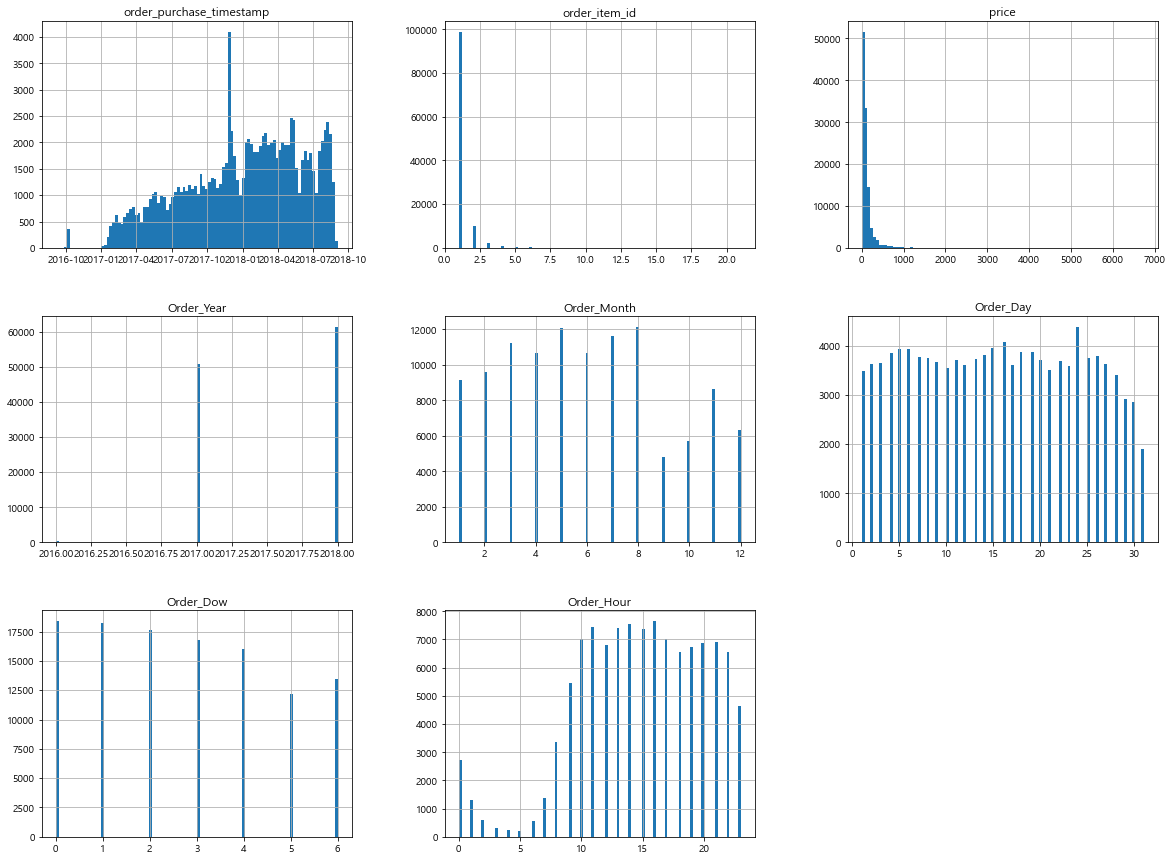

In [32]:
_ = df.hist(figsize=(20, 15), bins=100)

# Seller_MAU(Monthly Active User)

In [33]:
df.groupby('Order_YM')['seller_id'].nunique().sort_index()

Order_YM
2016-09       3
2016-10     143
2016-12       1
2017-01     227
2017-02     427
2017-03     499
2017-04     506
2017-05     583
2017-06     539
2017-07     606
2017-08     708
2017-09     731
2017-10     776
2017-11     965
2017-12     861
2018-01     970
2018-02     947
2018-03     996
2018-04    1123
2018-05    1115
2018-06    1175
2018-07    1261
2018-08    1278
2018-09       1
Name: seller_id, dtype: int64

In [34]:
# 변수에 넣기
sell_Order_YM= df.groupby('Order_YM')['seller_id'].nunique().sort_index()
# 마지막에껀 필요없으니 빼자
sell_Order_YM = sell_Order_YM[:-1]
sell_Order_YM

Order_YM
2016-09       3
2016-10     143
2016-12       1
2017-01     227
2017-02     427
2017-03     499
2017-04     506
2017-05     583
2017-06     539
2017-07     606
2017-08     708
2017-09     731
2017-10     776
2017-11     965
2017-12     861
2018-01     970
2018-02     947
2018-03     996
2018-04    1123
2018-05    1115
2018-06    1175
2018-07    1261
2018-08    1278
Name: seller_id, dtype: int64

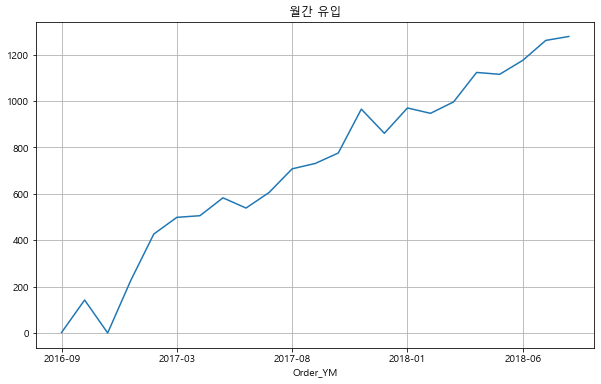

In [121]:
# 월간추이
plt.figure(figsize = (10,6))
sell_Order_YM.plot(grid = True)
plt.title('월간 유입')
plt.show()

### -> seller유입 지속적으로 상승

## 월별, 주문건, 중복을 제외한 주문제품 종류 수, 고객 수, 총 주문금액

In [36]:
df.head(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_id,customer_unique_id,product_id,product_category_name,product_category_name_english,price,seller_id,seller_city,seller_state,Order_Year,Order_Month,Order_Day,Order_Dow,Order_Day_Name,Order_YM,Order_Time,Order_Hour
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,10,2,0,Monday,2017-10,10:56:33,10
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,8,15,1,Tuesday,2017-08,18:29:31,18


- df(유효고객, 유효주문)에 대해 월별 데이터(Order_YM)를 확인


In [37]:
ym_sale =  df.groupby('Order_YM').agg({"product_category_name":"nunique", 
                                      "seller_id":"nunique",
                                      "order_id":"nunique",                                       
                                      "price":('mean',"sum")
                                     }).style.format("{:,.0f}")
ym_sale

# 월단위 데이터 전처리

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 113424
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_status                   112650 non-null  object        
 2   order_purchase_timestamp       112650 non-null  datetime64[ns]
 3   order_approved_at              112635 non-null  object        
 4   order_delivered_carrier_date   111456 non-null  object        
 5   order_delivered_customer_date  110196 non-null  object        
 6   order_estimated_delivery_date  112650 non-null  object        
 7   order_item_id                  112650 non-null  float64       
 8   customer_id                    112650 non-null  object        
 9   customer_unique_id             112650 non-null  object        
 10  product_id                     112650 non-null  object        
 11  

In [39]:
df.head(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_id,customer_unique_id,product_id,product_category_name,product_category_name_english,price,seller_id,seller_city,seller_state,Order_Year,Order_Month,Order_Day,Order_Dow,Order_Day_Name,Order_YM,Order_Time,Order_Hour
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,10,2,0,Monday,2017-10,10:56:33,10
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,8,15,1,Tuesday,2017-08,18:29:31,18


In [40]:
def get_month_day1(x): 
    return dt.datetime(x.year, x.month, 1)

In [41]:
df["order_purchase_timestamp"].iloc[2000]

Timestamp('2017-04-12 15:08:28')

In [42]:
get_month_day1(df["order_purchase_timestamp"].iloc[2000])

datetime.datetime(2017, 4, 1, 0, 0)

In [43]:
df["해당판매월"] = df["order_purchase_timestamp"].map(get_month_day1)
df[["order_purchase_timestamp", "해당판매월"]].sample(3)

,order_purchase_timestamp,해당판매월
65288,2018-04-17 09:58:31,2018-04-01
94110,2018-01-16 17:18:17,2018-01-01
17290,2018-02-18 19:22:11,2018-02-01


In [44]:
df.groupby("seller_id")["해당판매월"].transform("min")

0        2017-07-01
1        2017-07-01
2        2017-07-01
3        2017-07-01
4        2017-07-01
            ...    
113420   2017-02-01
113421   2017-02-01
113422   2017-02-01
113423   2017-02-01
113424   2017-05-01
Name: 해당판매월, Length: 112650, dtype: datetime64[ns]

In [45]:
df["첫판매월"] = df.groupby("seller_id")["해당판매월"].transform("min")
df[["order_purchase_timestamp", "첫판매월", "해당판매월"]].sample(3)

,order_purchase_timestamp,첫판매월,해당판매월
20958,2018-06-08 20:39:16,2018-05-01,2018-06-01
99025,2017-03-14 12:30:59,2016-10-01,2017-03-01
68217,2018-08-21 11:10:08,2017-10-01,2018-08-01


## 첫판매일로부터 몇달째 판매인가?

In [46]:
year_diff = df["해당판매월"].dt.year - df["첫판매월"].dt.year
month_diff = df["해당판매월"].dt.month - df["첫판매월"].dt.month

In [47]:
df["몇달째판매"] = (year_diff * 12) + month_diff + 1

## 코호트 월별 빈도수

In [48]:
df["몇달째판매"].value_counts().sort_index()

1     7984
2     8501
3     8333
4     8779
5     8908
6     7800
7     7760
8     7272
9     6661
10    6352
11    6216
12    4719
13    4328
14    4204
15    3549
16    2934
17    2660
18    2265
19    1634
20     779
21     325
22     332
23     341
24      14
Name: 몇달째판매, dtype: int64

In [49]:
cohort_sell_term = df["몇달째판매"].value_counts().sort_index().to_frame()
cohort_sell_term = cohort_sell_term.reset_index()
cohort_sell_term.columns = ['month', 'cnt']
cohort_sell_term

,month,cnt
0,1,7984
1,2,8501
2,3,8333
3,4,8779
4,5,8908
5,6,7800
6,7,7760
7,8,7272
8,9,6661
9,10,6352


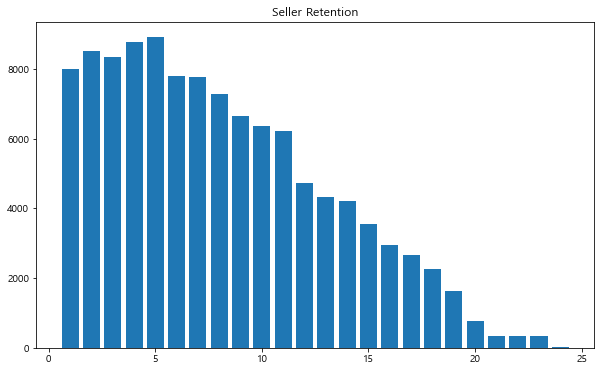

In [50]:
plt.figure(figsize = (10,6))
plt.bar(cohort_sell_term['month'], cohort_sell_term['cnt'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Seller Retention')
plt.show()

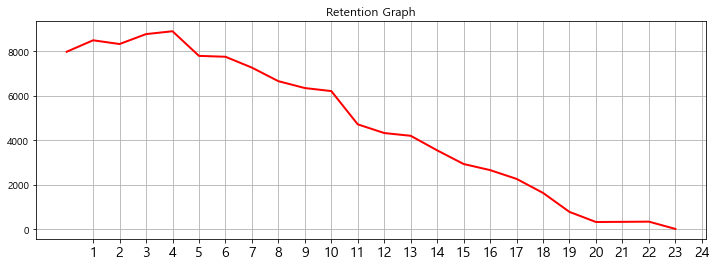

In [51]:
plt.figure(figsize=(12, 4))
cohort_sell_term['cnt'].plot(grid = True, linewidth=2, color = 'r')
plt.title('Retention Graph')
plt.xticks(cohort_sell_term['month'], fontsize=14)

plt.show()

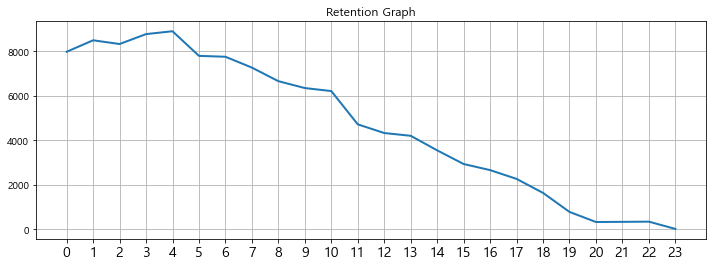

In [52]:
plt.figure(figsize=(12, 4))
cohort_sell_term['cnt'].plot(grid = True, linewidth=2)
plt.title('Retention Graph')
plt.xticks(cohort_sell_term['month'].index, fontsize=14)

plt.show()

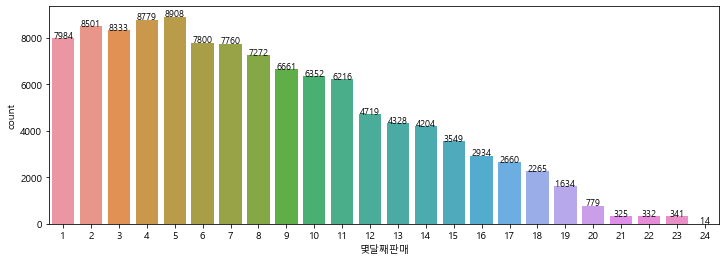

In [53]:
plt.figure(figsize=(12, 4))
total = len(df)
ax = sns.countplot(data=df, x="몇달째판매")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)


In [54]:
df.head(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_id,customer_unique_id,product_id,product_category_name,product_category_name_english,price,seller_id,seller_city,seller_state,Order_Year,Order_Month,Order_Day,Order_Dow,Order_Day_Name,Order_YM,Order_Time,Order_Hour,해당판매월,첫판매월,몇달째판매
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,10,2,0,Monday,2017-10,10:56:33,10,2017-10-01,2017-07-01,4
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,2017,8,15,1,Tuesday,2017-08,18:29:31,18,2017-08-01,2017-07-01,2


# 잔존 빈도 구하기

In [55]:
cohort_count = df.groupby(["첫판매월", "몇달째판매"])["seller_id"].nunique().unstack()
cohort_count

몇달째판매,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
첫판매월,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01,3.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
2016-10-01,141.0,NaN,NaN,74.0,91.0,81.0,77.0,82.0,72.0,73.0,68.0,66.0,65.0,66.0,66.0,64.0,60.0,57.0,51.0,45.0,45.0,45.0,45.0,NaN
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,151.0,107.0,105.0,90.0,96.0,87.0,75.0,86.0,76.0,79.0,76.0,62.0,68.0,62.0,67.0,65.0,54.0,55.0,50.0,56.0,NaN,NaN,NaN,NaN
2017-02-01,228.0,139.0,122.0,123.0,101.0,111.0,111.0,97.0,95.0,95.0,96.0,84.0,83.0,81.0,88.0,69.0,71.0,65.0,58.0,NaN,NaN,NaN,NaN,NaN
2017-03-01,173.0,100.0,94.0,85.0,79.0,83.0,77.0,70.0,83.0,63.0,68.0,56.0,58.0,52.0,50.0,51.0,44.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,116.0,63.0,55.0,58.0,57.0,52.0,44.0,55.0,44.0,44.0,37.0,39.0,36.0,34.0,29.0,32.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,124.0,62.0,62.0,64.0,58.0,53.0,54.0,46.0,49.0,50.0,44.0,39.0,34.0,29.0,34.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,76.0,32.0,31.0,36.0,24.0,29.0,28.0,25.0,21.0,22.0,21.0,20.0,16.0,17.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
cohort_count.index = cohort_count.index.astype(str)
cohort_count

몇달째판매,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
첫판매월,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01,3.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
2016-10-01,141.0,NaN,NaN,74.0,91.0,81.0,77.0,82.0,72.0,73.0,68.0,66.0,65.0,66.0,66.0,64.0,60.0,57.0,51.0,45.0,45.0,45.0,45.0,NaN
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,151.0,107.0,105.0,90.0,96.0,87.0,75.0,86.0,76.0,79.0,76.0,62.0,68.0,62.0,67.0,65.0,54.0,55.0,50.0,56.0,NaN,NaN,NaN,NaN
2017-02-01,228.0,139.0,122.0,123.0,101.0,111.0,111.0,97.0,95.0,95.0,96.0,84.0,83.0,81.0,88.0,69.0,71.0,65.0,58.0,NaN,NaN,NaN,NaN,NaN
2017-03-01,173.0,100.0,94.0,85.0,79.0,83.0,77.0,70.0,83.0,63.0,68.0,56.0,58.0,52.0,50.0,51.0,44.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,116.0,63.0,55.0,58.0,57.0,52.0,44.0,55.0,44.0,44.0,37.0,39.0,36.0,34.0,29.0,32.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,124.0,62.0,62.0,64.0,58.0,53.0,54.0,46.0,49.0,50.0,44.0,39.0,34.0,29.0,34.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,76.0,32.0,31.0,36.0,24.0,29.0,28.0,25.0,21.0,22.0,21.0,20.0,16.0,17.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='몇달째판매', ylabel='첫판매월'>

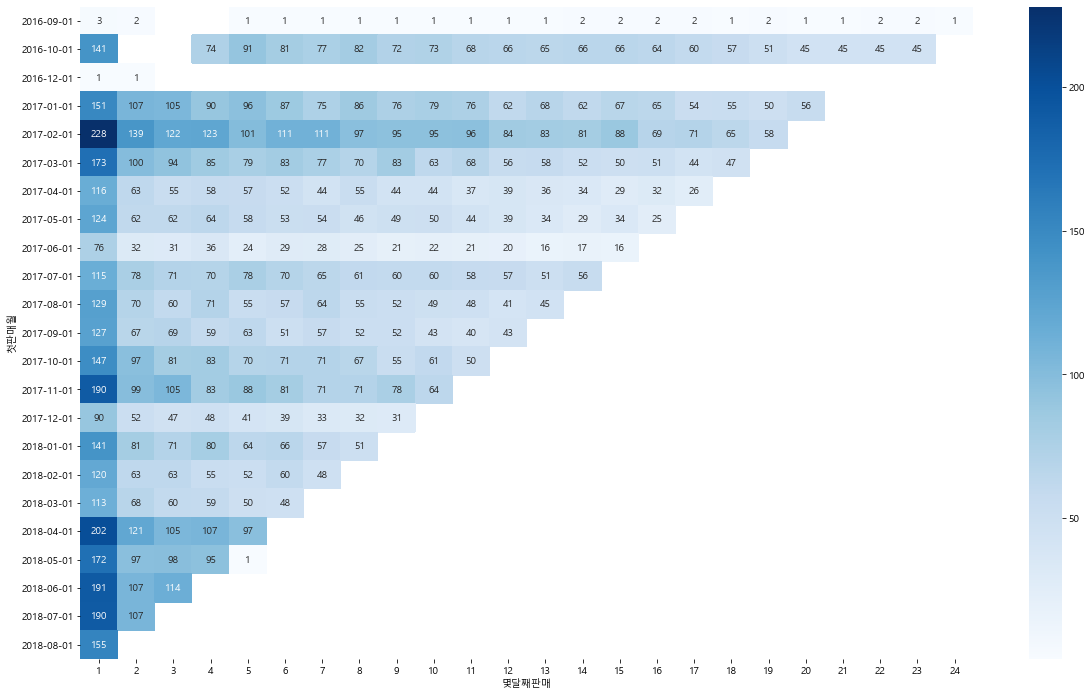

In [57]:
plt.figure(figsize=(20, 12))
sns.heatmap(cohort_count, annot=True, cmap="Blues", fmt=".0f")

## 월별 신규 유입 seller(Acqusition)

In [58]:
cohort_count[1]

첫판매월
2016-09-01      3.0
2016-10-01    141.0
2016-12-01      1.0
2017-01-01    151.0
2017-02-01    228.0
2017-03-01    173.0
2017-04-01    116.0
2017-05-01    124.0
2017-06-01     76.0
2017-07-01    115.0
2017-08-01    129.0
2017-09-01    127.0
2017-10-01    147.0
2017-11-01    190.0
2017-12-01     90.0
2018-01-01    141.0
2018-02-01    120.0
2018-03-01    113.0
2018-04-01    202.0
2018-05-01    172.0
2018-06-01    191.0
2018-07-01    190.0
2018-08-01    155.0
Name: 1, dtype: float64

<AxesSubplot:title={'center':'Monthly Acqusition'}, ylabel='첫판매월'>

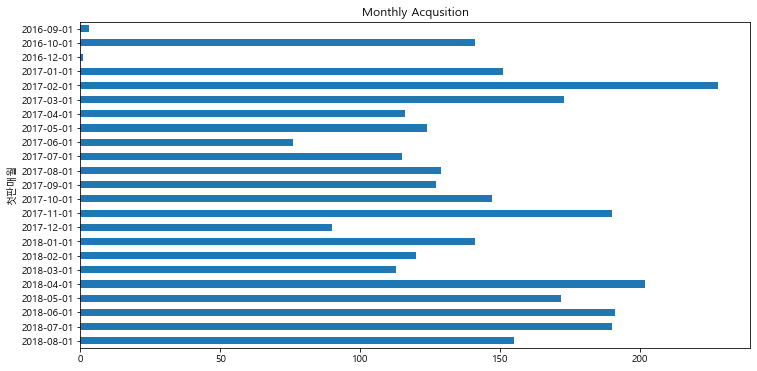

In [123]:
# Monthly Acqusition 을 구합니다.
cohort_count[1].sort_index(
    ascending=False).plot.barh(figsize=(12, 6), title="Monthly Acqusition")

# 잔존율 구하기

In [60]:
cohort_ratio = cohort_count.div(cohort_count[1], axis=0) * 100
cohort_ratio.round(2)

몇달째판매,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
첫판매월,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,66.67,NaN,NaN,33.33,33.33,33.33,33.33,33.33,33.33,33.33,33.33,33.33,66.67,66.67,66.67,66.67,33.33,66.67,33.33,33.33,66.67,66.67,33.33
2016-10-01,100.0,NaN,NaN,52.48,64.54,57.45,54.61,58.16,51.06,51.77,48.23,46.81,46.10,46.81,46.81,45.39,42.55,40.43,36.17,31.91,31.91,31.91,31.91,NaN
2016-12-01,100.0,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,100.0,70.86,69.54,59.60,63.58,57.62,49.67,56.95,50.33,52.32,50.33,41.06,45.03,41.06,44.37,43.05,35.76,36.42,33.11,37.09,NaN,NaN,NaN,NaN
2017-02-01,100.0,60.96,53.51,53.95,44.30,48.68,48.68,42.54,41.67,41.67,42.11,36.84,36.40,35.53,38.60,30.26,31.14,28.51,25.44,NaN,NaN,NaN,NaN,NaN
2017-03-01,100.0,57.80,54.34,49.13,45.66,47.98,44.51,40.46,47.98,36.42,39.31,32.37,33.53,30.06,28.90,29.48,25.43,27.17,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,100.0,54.31,47.41,50.00,49.14,44.83,37.93,47.41,37.93,37.93,31.90,33.62,31.03,29.31,25.00,27.59,22.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,100.0,50.00,50.00,51.61,46.77,42.74,43.55,37.10,39.52,40.32,35.48,31.45,27.42,23.39,27.42,20.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,100.0,42.11,40.79,47.37,31.58,38.16,36.84,32.89,27.63,28.95,27.63,26.32,21.05,22.37,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='몇달째판매', ylabel='첫판매월'>

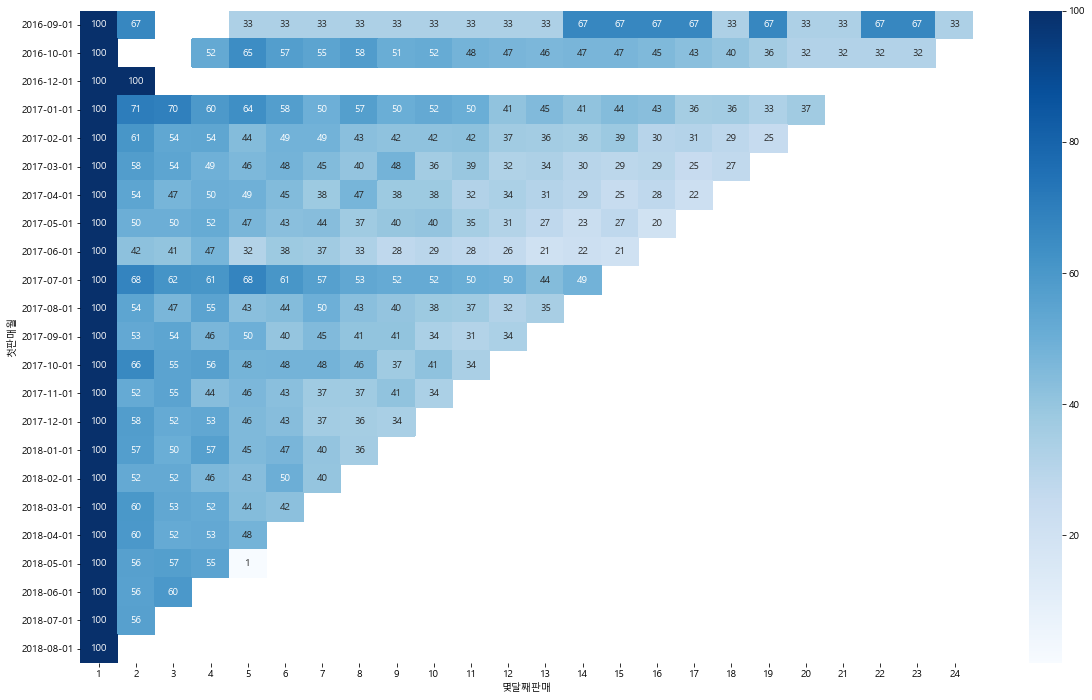

In [61]:
plt.figure(figsize=(20, 12))
sns.heatmap(cohort_ratio, cmap="Blues", annot=True, fmt=".0f")

# 리텐션 수치

In [65]:
retention = df.groupby(["첫판매월", "몇달째판매"])["seller_id"].nunique().unstack()

In [66]:
retention = retention.reset_index().fillna(0)
retention

몇달째판매,첫판매월,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,2016-09-01,3.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
1,2016-10-01,141.0,0.0,0.0,74.0,91.0,81.0,77.0,82.0,72.0,73.0,68.0,66.0,65.0,66.0,66.0,64.0,60.0,57.0,51.0,45.0,45.0,45.0,45.0,0.0
2,2016-12-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01,151.0,107.0,105.0,90.0,96.0,87.0,75.0,86.0,76.0,79.0,76.0,62.0,68.0,62.0,67.0,65.0,54.0,55.0,50.0,56.0,0.0,0.0,0.0,0.0
4,2017-02-01,228.0,139.0,122.0,123.0,101.0,111.0,111.0,97.0,95.0,95.0,96.0,84.0,83.0,81.0,88.0,69.0,71.0,65.0,58.0,0.0,0.0,0.0,0.0,0.0
5,2017-03-01,173.0,100.0,94.0,85.0,79.0,83.0,77.0,70.0,83.0,63.0,68.0,56.0,58.0,52.0,50.0,51.0,44.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2017-04-01,116.0,63.0,55.0,58.0,57.0,52.0,44.0,55.0,44.0,44.0,37.0,39.0,36.0,34.0,29.0,32.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2017-05-01,124.0,62.0,62.0,64.0,58.0,53.0,54.0,46.0,49.0,50.0,44.0,39.0,34.0,29.0,34.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2017-06-01,76.0,32.0,31.0,36.0,24.0,29.0,28.0,25.0,21.0,22.0,21.0,20.0,16.0,17.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2017-07-01,115.0,78.0,71.0,70.0,78.0,70.0,65.0,61.0,60.0,60.0,58.0,57.0,51.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
len(retention.columns)

25

In [70]:
retention.columns[0]

'첫판매월'

In [71]:
retention.columns[1]

1

In [72]:
retention[1]

0       3.0
1     141.0
2       1.0
3     151.0
4     228.0
5     173.0
6     116.0
7     124.0
8      76.0
9     115.0
10    129.0
11    127.0
12    147.0
13    190.0
14     90.0
15    141.0
16    120.0
17    113.0
18    202.0
19    172.0
20    191.0
21    190.0
22    155.0
Name: 1, dtype: float64

In [73]:
retention[1].sum()

3095.0

In [83]:
real_retention = []
for i in range(1, 25):
    print(i,retention[i].sum()) 
    real_retention.append(int(retention[i].sum()))

1 3095.0
2 1613.0
3 1413.0
4 1340.0
5 1166.0
6 1040.0
7 933.0
8 851.0
9 769.0
10 704.0
11 607.0
12 508.0
13 457.0
14 399.0
15 352.0
16 308.0
17 257.0
18 225.0
19 161.0
20 102.0
21 46.0
22 47.0
23 47.0
24 1.0


In [114]:
real_retention_df = pd.DataFrame(real_retention)
real_retention_df.index = list(range(1,25))
real_retention_df.columns = ['retention']
real_retention_df

,retention
1,3095
2,1613
3,1413
4,1340
5,1166
6,1040
7,933
8,851
9,769
10,704


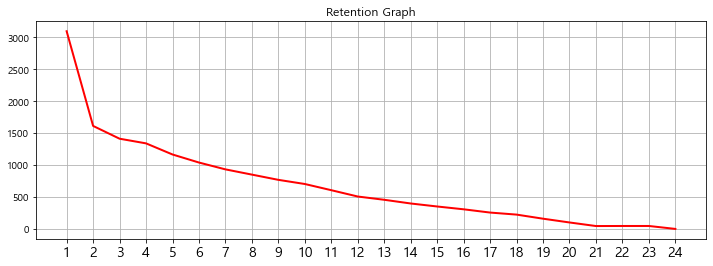

In [117]:
plt.figure(figsize=(12, 4))
real_retention_df['retention'].plot(grid = True, linewidth=2, color = 'r')
plt.title('Retention Graph')
plt.xticks(real_retention_df.index, fontsize=14)

plt.show()

# real_retention_df.plot()


# 리텐션 비율

In [95]:
retention2 = cohort_ratio.reset_index()

In [96]:
retention2 

몇달째판매,첫판매월,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,2016-09-01,100.0,66.666667,NaN,NaN,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,66.666667,66.666667,66.666667,66.666667,33.333333,66.666667,33.333333,33.333333,66.666667,66.666667,33.333333
1,2016-10-01,100.0,NaN,NaN,52.482270,64.539007,57.446809,54.609929,58.156028,51.063830,51.773050,48.226950,46.808511,46.099291,46.808511,46.808511,45.390071,42.553191,40.425532,36.170213,31.914894,31.914894,31.914894,31.914894,NaN
2,2016-12-01,100.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,100.0,70.860927,69.536424,59.602649,63.576159,57.615894,49.668874,56.953642,50.331126,52.317881,50.331126,41.059603,45.033113,41.059603,44.370861,43.046358,35.761589,36.423841,33.112583,37.086093,NaN,NaN,NaN,NaN
4,2017-02-01,100.0,60.964912,53.508772,53.947368,44.298246,48.684211,48.684211,42.543860,41.666667,41.666667,42.105263,36.842105,36.403509,35.526316,38.596491,30.263158,31.140351,28.508772,25.438596,NaN,NaN,NaN,NaN,NaN
5,2017-03-01,100.0,57.803468,54.335260,49.132948,45.664740,47.976879,44.508671,40.462428,47.976879,36.416185,39.306358,32.369942,33.526012,30.057803,28.901734,29.479769,25.433526,27.167630,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-04-01,100.0,54.310345,47.413793,50.000000,49.137931,44.827586,37.931034,47.413793,37.931034,37.931034,31.896552,33.620690,31.034483,29.310345,25.000000,27.586207,22.413793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-05-01,100.0,50.000000,50.000000,51.612903,46.774194,42.741935,43.548387,37.096774,39.516129,40.322581,35.483871,31.451613,27.419355,23.387097,27.419355,20.161290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-06-01,100.0,42.105263,40.789474,47.368421,31.578947,38.157895,36.842105,32.894737,27.631579,28.947368,27.631579,26.315789,21.052632,22.368421,21.052632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-07-01,100.0,67.826087,61.739130,60.869565,67.826087,60.869565,56.521739,53.043478,52.173913,52.173913,50.434783,49.565217,44.347826,48.695652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
real_retention2 = []
for i in range(1, 25):
    print(i,round(retention2[i].mean())) 
    real_retention2.append(round(retention2[i].mean()))

1 100
2 60
3 54
4 52
5 45
6 46
7 44
8 43
9 41
10 40
11 38
12 36
13 35
14 38
15 37
16 38
17 37
18 33
19 40
20 34
21 33
22 49
23 49
24 33


<AxesSubplot:>

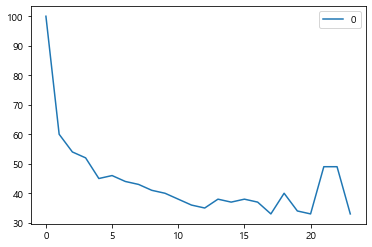

In [103]:
pd.DataFrame(real_retention2).plot()

In [119]:
real_retention_df2 = pd.DataFrame(real_retention2)
real_retention_df2.index = list(range(1,25))
real_retention_df2.columns = ['retention']
real_retention_df2

,retention
1,100
2,60
3,54
4,52
5,45
6,46
7,44
8,43
9,41
10,40


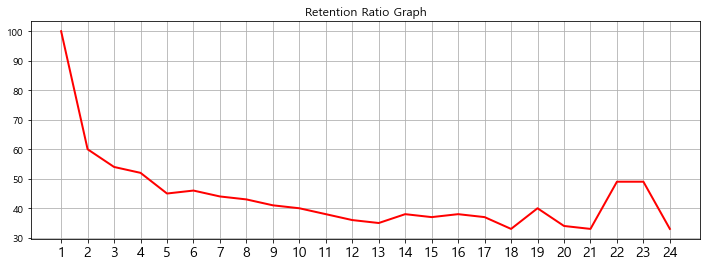

In [120]:
plt.figure(figsize=(12, 4))
real_retention_df2['retention'].plot(grid = True, linewidth=2, color = 'r')
plt.title('Retention Ratio Graph')
plt.xticks(real_retention_df2.index, fontsize=14)

plt.show()